<a href="https://colab.research.google.com/github/Sambhaji6529/Company_EDA-Project/blob/main/Company_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # linear algebra
import numpy as np
import seaborn as sns
import os, sys
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot') # using for plot background 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/companies.csv")
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [ ]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [ ]:
df.shape  #number of rows and columns in dataset

(66368, 14)

In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
df['name'].value_counts()

Blink                                         4
Peach                                         4
Spire                                         4
Roost                                         4
Karma                                         4
                                             ..
Game Time Giving, Inc                         1
Game Time Tickets                             1
Game Trading technologies, Inc.               1
Game Trust                                    1
İnovatiff Reklam ve Tanıtım Hizmetleri Tic    1
Name: name, Length: 66102, dtype: int64

In [ ]:
#how many top 10 company name  in world
df['name'].value_counts()[0:10]

Blink        4
Peach        4
Spire        4
Roost        4
Karma        4
Dash         3
Hopscotch    3
Chime        3
Helpr        3
Gather       3
Name: name, dtype: int64

In [ ]:
#only name print
list(df['name'].value_counts()[0:10].keys())

['Blink',
 'Peach',
 'Spire',
 'Roost',
 'Karma',
 'Dash',
 'Hopscotch',
 'Chime',
 'Helpr',
 'Gather']

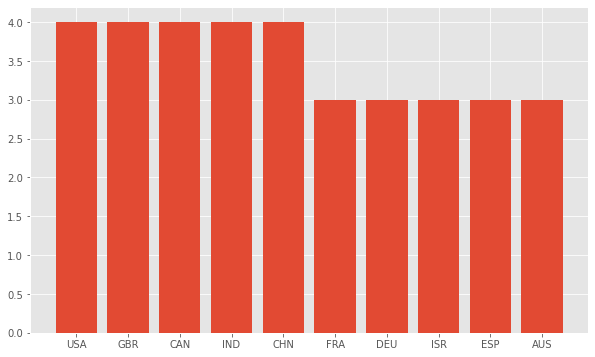

In [ ]:
#plot the bar
plt.figure(figsize=(10,6))
plt.bar(list(df['country_code'].value_counts()[:10].keys()),list(df['name'].value_counts()[:10]))
plt.show()

In [ ]:
#how many compay are open and closed
df['status'].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [ ]:
#which area or city in company 
df['region'].value_counts()

SF Bay Area         8804
New York City       3528
Boston              2378
London              2345
Los Angeles         1877
                    ... 
Sophia Antipolis       1
MOZ - Other            1
Kolbermoor             1
UGA - Other            1
Muenchen               1
Name: region, Length: 1092, dtype: int64

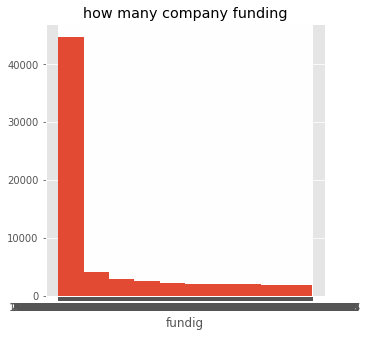

In [ ]:
#making a histogram
plt.figure(figsize=(5,5))
plt.hist(df['funding_total_usd'])
plt.title("how many company funding")
plt.xlabel("fundig")
plt.show()

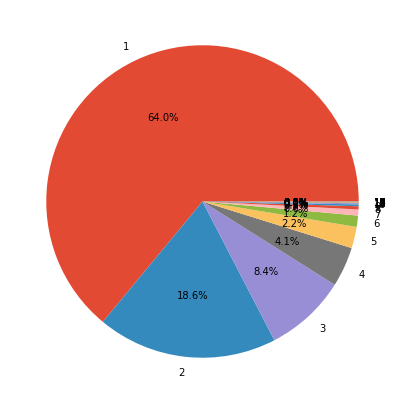

In [ ]:
#how many company are funding
plt.figure(figsize=(7,9))
plt.pie(list(df['funding_rounds'].value_counts()),labels=list(df['funding_rounds'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


In [ ]:
df.dtypes #Kind of data each column consists

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [ ]:
df.nunique() # check unique values

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [ ]:
df['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [ ]:
#counts specfic column 
df['status'].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

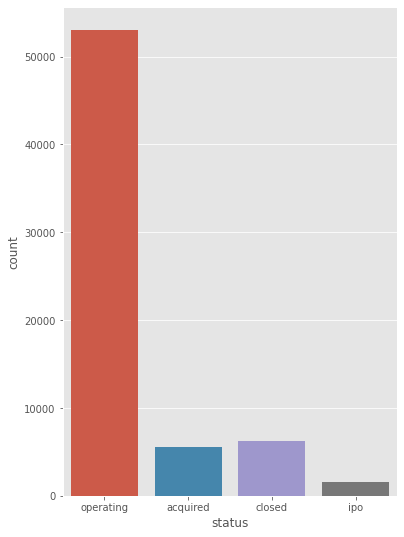

In [ ]:
plt.figure(figsize=(6,9))
sns.countplot('status',data=df)
plt.show()

In [ ]:
df['funding_rounds'].unique()

array([ 1,  2,  4,  3,  9,  5,  6,  7,  8, 10, 11, 12, 15, 13, 14, 17, 18,
       16, 19])

In [ ]:
df['funding_rounds'].value_counts()

1     42472
2     12353
3      5606
4      2739
5      1468
6       774
7       418
8       214
9       126
10       79
11       51
12       28
13       15
15        6
14        6
16        6
17        3
18        3
19        1
Name: funding_rounds, dtype: int64

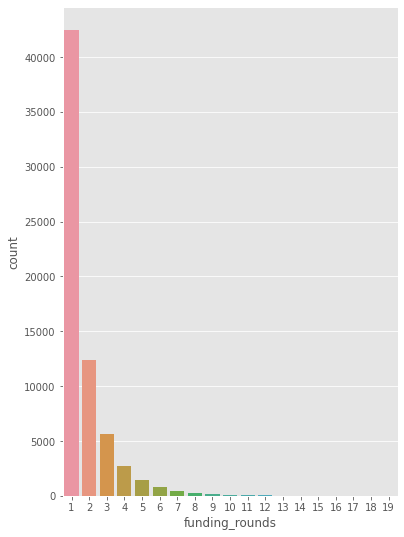

In [ ]:
plt.figure(figsize=(6,9))
sns.countplot('funding_rounds',data=df)
plt.show()

In [ ]:
df['founded_at']=pd.to_datetime(df['founded_at'],errors='coerce')

In [ ]:
df['day']=(df['founded_at']).dt.day
df['month']=(df['founded_at']).dt.month
df['year']=(df['founded_at']).dt.year

In [ ]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,NaN,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,NaN,NaN,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,13.0,5.0,2012.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1.0,1.0,2011.0
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,1.0,1.0,2014.0


In [ ]:
df.groupby('month')['funding_rounds'].sum()

month
1.0     55684
2.0      3512
3.0      3999
4.0      3660
5.0      3694
6.0      3947
7.0      3360
8.0      3337
9.0      3471
10.0     3572
11.0     3410
12.0     2807
Name: funding_rounds, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(df, x="month", y="funding_rounds", color="month")
           
fig.show()

In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dir(px.colors.qualitative)
#dir(px.colors.sequential)

In [ ]:
df=df.dropna(how="any",axis=0)  #dropping all those columns having a any null value
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
df.shape

(42980, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42980 entries, 1 to 66366
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          42980 non-null  object        
 1   name               42980 non-null  object        
 2   homepage_url       42980 non-null  object        
 3   category_list      42980 non-null  object        
 4   funding_total_usd  42980 non-null  object        
 5   status             42980 non-null  object        
 6   country_code       42980 non-null  object        
 7   state_code         42980 non-null  object        
 8   region             42980 non-null  object        
 9   city               42980 non-null  object        
 10  funding_rounds     42980 non-null  int64         
 11  founded_at         42980 non-null  datetime64[ns]
 12  first_funding_at   42980 non-null  object        
 13  last_funding_at    42980 non-null  object        
 14  day   


# **Drop Unwanted Column**

In [ ]:
df.drop(["homepage_url"],axis="columns", inplace=True)
df.head()

,permalink,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
3,/organization/0-6-com,0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1.0,1.0,1997.0
7,/organization/0xdata,H2O.ai,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.0,1.0,2011.0


In [ ]:
df.drop(["permalink"],axis="columns",inplace=True)
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
3,0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,004 Technologies,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
6,Ondine Biomedical Inc.,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1.0,1.0,1997.0
7,H2O.ai,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.0,1.0,2011.0


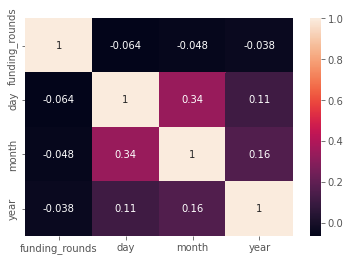

In [ ]:
#Relationship analysis
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)
plt.show()

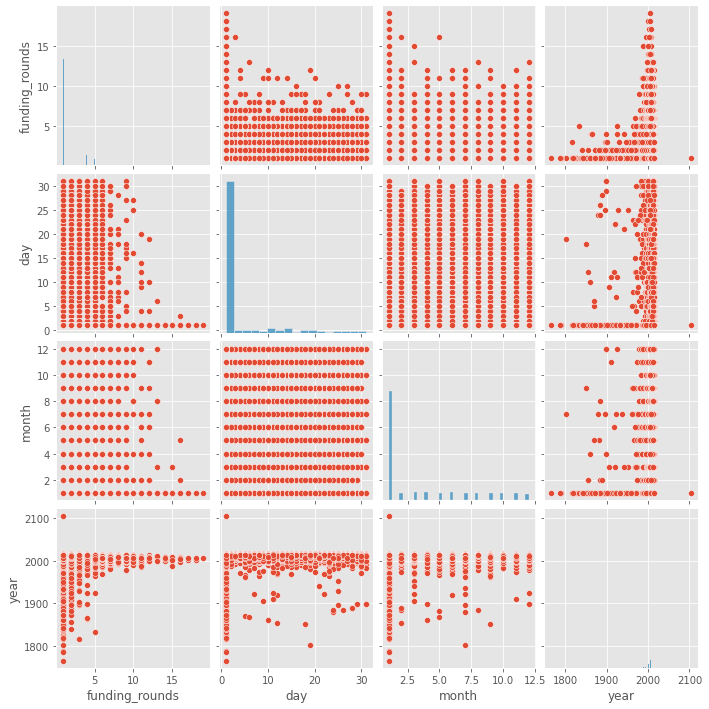

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
sns.relplot(x='funding-total',y='funding_rounds',hue='status', data=df)
plt.show()

ValueError: ignored

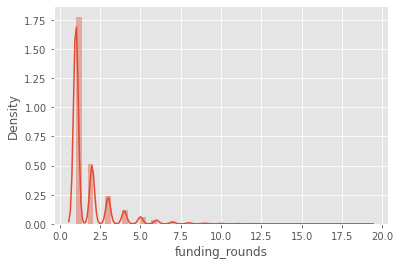

In [ ]:
sns.distplot(df['funding_rounds'])
plt.show()

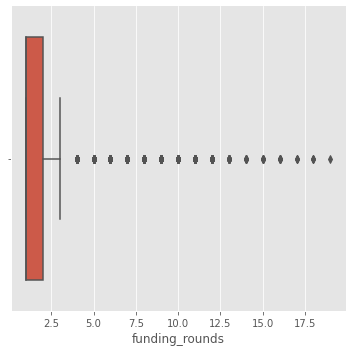

In [ ]:
sns.catplot(x='funding_rounds', kind='box', data=df)
plt.show()

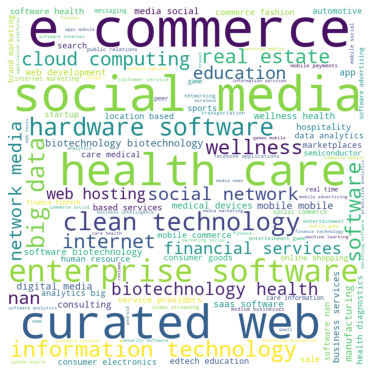

In [ ]:

# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.category_list:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
     


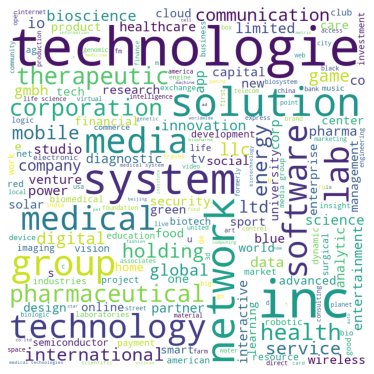

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.name:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

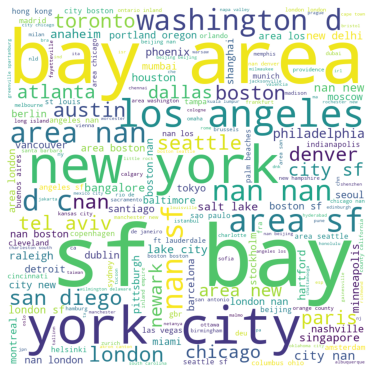

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.region:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

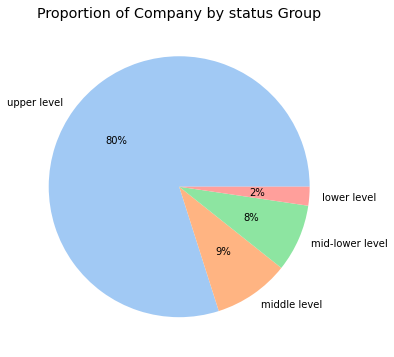

In [ ]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["status"].value_counts(normalize=True)

#Define labels
labels = ["upper level","middle level","mid-lower level","lower level"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Company by status Group")
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
figure = go.Figure(data=go.Choropleth(locations=df["country_code"],
                                      z = df["funding_total_usd"],
                                      locationmode="USA-states",
                                      colorscale="Reds",
                                      colorbar_title="Millions USD"))
figure.update_layout( geo_scope='usa')
figure.show()